# k-Nearest Neighborhood Algorithm 실습

# 1. 데이터, 모듈 불러오기 및 kNN 피팅 방법

- 함수 불러오기

In [1]:
from sklearn import neighbors, datasets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [262]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

x_names = iris.feature_names
y_names = iris.target_names

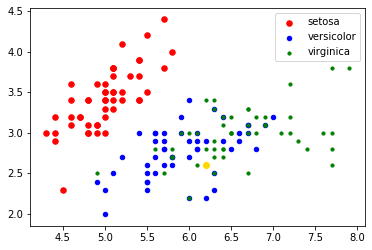

In [192]:
group_color = {0: 'red', 1: 'blue', 2: 'green'}
for sp in np.unique(y):
    x = X[y==sp]
    plt.scatter(x[:, 0], x[:, 1], color=group_color[sp], label=y_names[sp], s=(3-sp)*10)
    plt.legend()
    
np.random.seed(23)
x1 = np.random.randint(X[:,0].min()*10, X[:,0].max()*10)/10
x2 = np.random.randint(X[:,1].min()*10, X[:,1].max()*10)/10
new_x = np.array([x1, x2])

plt.scatter(x1, x2, color='gold')

plt.show()

In [283]:
def mode(arr): # 최빈값을 구하는 함수
    d = dict()
    for key in arr:
        d.setdefault(key, 0)
    for x in arr:
        d[x] += 1
        
    res = sorted(list(d.items()), key=lambda x: x[1], reverse=True)[0][0]
        
    return res

In [297]:
def KNN(X_train, y_train, X_test, y_test, k=3): # KNN 예측치 반환하는 함수
    dist = ((X_train-X_test)**2).sum(axis=1)

    k_index = dist.argsort()[:k] # 거리가 가장 가까운 k개의 인덱스
    k_X = X_train[k_index]
    res = mode(y_train[k_index]) # k개 중 가장 많은 label
    
    return res

def KNN_acc(res, y_test): # KNN 예측결과 정답 판별
    if res == y_test: return 1
    else: return 0

In [365]:
np.random.seed(1010)
shuffled = np.arange(0,len(X))
np.random.shuffle(shuffled)
X_s = X[shuffled]
y_s = y[shuffled]

cv = 10
t = len(X_s)//cv
cv_scores = [] # k번째 cv번의 CV결과 평균

for k in range(1,101):
    cv_acc = 0
    for c in range(1, cv+1):        
        X_test = X_s[(c-1)*t:c*t]
        y_test = y_s[(c-1)*t:c*t]

        X_train = np.concatenate([X_s[0:(c-1)*15], X_s[c*15:len(X_s)]])
        y_train = np.concatenate([y_s[0:(c-1)*15], y_s[c*15:len(X_s)]])

        temp_acc_sum = 0
        scores_temp = []
        for i in range(len(X_test)):
            res = KNN(X_train, y_train, X_test[i], y_test[i], k)
            temp_acc = KNN_acc(res, y_test[i])
            temp_acc_sum += temp_acc
            
        cv_acc += temp_acc_sum/t
    cv_scores.append(cv_acc/cv)

0.8400000000000002

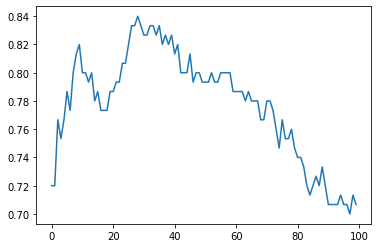

In [366]:
plt.plot(cv_scores)
max(cv_scores)

- 모델 구축

In [13]:
clf = neighbors.KNeighborsClassifier(5)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
y_pred=clf.predict(X)

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(y,y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]], dtype=int64)

# 2.Cross-validation을 활용한 최적의 k찾기

- 함수 불러오기
- "from sklearn.cross_validation import cross_val_score" 코드가 아래와 같이 변경되었습니다.

In [338]:
from sklearn.model_selection import cross_val_score

- CV 진행

In [339]:
k_range = range(1,100)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

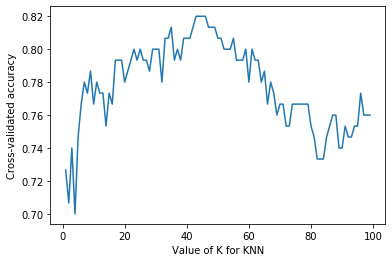

In [340]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

# 2.Weight를 준 kNN

In [ ]:
n_neighbors = 40

h = .02  # step size in the mesh

cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

for weights in ['uniform', 'distance']:
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

In [ ]:
np.random.seed(0)
X = np.sort(5 * np.random.rand(40, 1), axis=0)
T = np.linspace(0, 5, 500)[:, np.newaxis]
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - np.random.rand(8))

In [ ]:
knn = neighbors.KNeighborsRegressor(n_neighbors)
y_ = knn.fit(X, y).predict(T)

In [ ]:
n_neighbors = 5

for i, weights in enumerate(['uniform', 'distance']):
    knn = neighbors.KNeighborsRegressor(n_neighbors, weights=weights)
    y_ = knn.fit(X, y).predict(T)

    plt.subplot(2, 1, i + 1)
    plt.scatter(X, y, c='k', label='data')
    plt.plot(T, y_, c='g', label='prediction')
    plt.axis('tight')
    plt.legend()
    plt.title("KNeighborsRegressor (k = %i, weights = '%s')" % (n_neighbors,
                                                                weights))

plt.tight_layout()
plt.show()